In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [4]:
ads_data = pd.read_csv(r'D:\vscode_files\python\notebooks\karpov_course\python\5_window_function\ads_data.csv',
                        parse_dates=['date', 'time'])
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [5]:
ads_clients_data = pd.read_csv(r'D:\vscode_files\python\notebooks\karpov_course\python\5_window_function\ads_clients_data.csv',
                                parse_dates=['date', 'create_date'])
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [6]:
event_pivot = ads_data.pivot_table(index='ad_id', columns='event', aggfunc=['size'])
event_pivot.head()

size       
event click   view
ad_id             
2       1.0  101.0
3       3.0  184.0
1902    1.0   41.0
2064    NaN   35.0
2132    1.0   58.0

In [7]:
event_pivot = event_pivot.fillna(0)
event_pivot.mean()

      event
size  click    113.137824
      view     923.131606
dtype: float64

In [8]:
sns.set(
font_scale=2,
style="whitegrid",
rc={'figure.figsize':(20,7)}
       )

In [9]:
ads_data.loc[ads_data.event == 'view'].ad_id.value_counts().head()

ad_id
112583    351802
107729    184596
107837     51996
28142      24152
45008      19668
Name: count, dtype: int64

In [10]:
log_views = np.log(ads_data.loc[ads_data.event == 'view'].ad_id.value_counts())
log_views.head()

ad_id
112583    12.770824
107729    12.125925
107837    10.858922
28142     10.092122
45008      9.886748
Name: count, dtype: float64

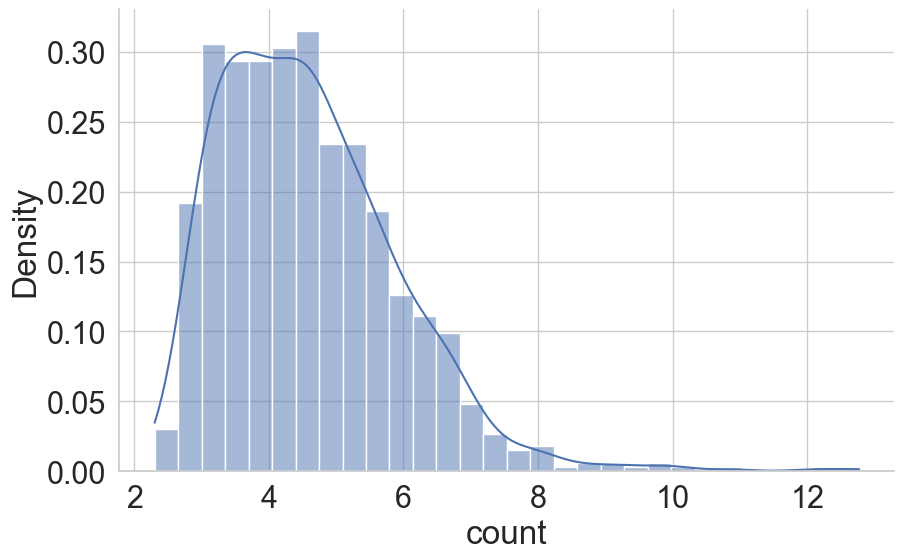

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=log_views, kde=True, stat='density', ax=ax)
sns.despine()

In [12]:
daily_ad_views = ads_data.loc[ads_data.event == 'view'].pivot_table(index='ad_id',
                                                                    columns='date',
                                                                    values='time', 
                                                                    aggfunc='count')
daily_ad_views.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [13]:
mean_views = daily_ad_views.mean()
mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [14]:
rolling_daily=mean_views.rolling(window=2).mean().round()
rolling_daily

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [15]:
rolling_daily['2019-04-06']

np.float64(598.0)

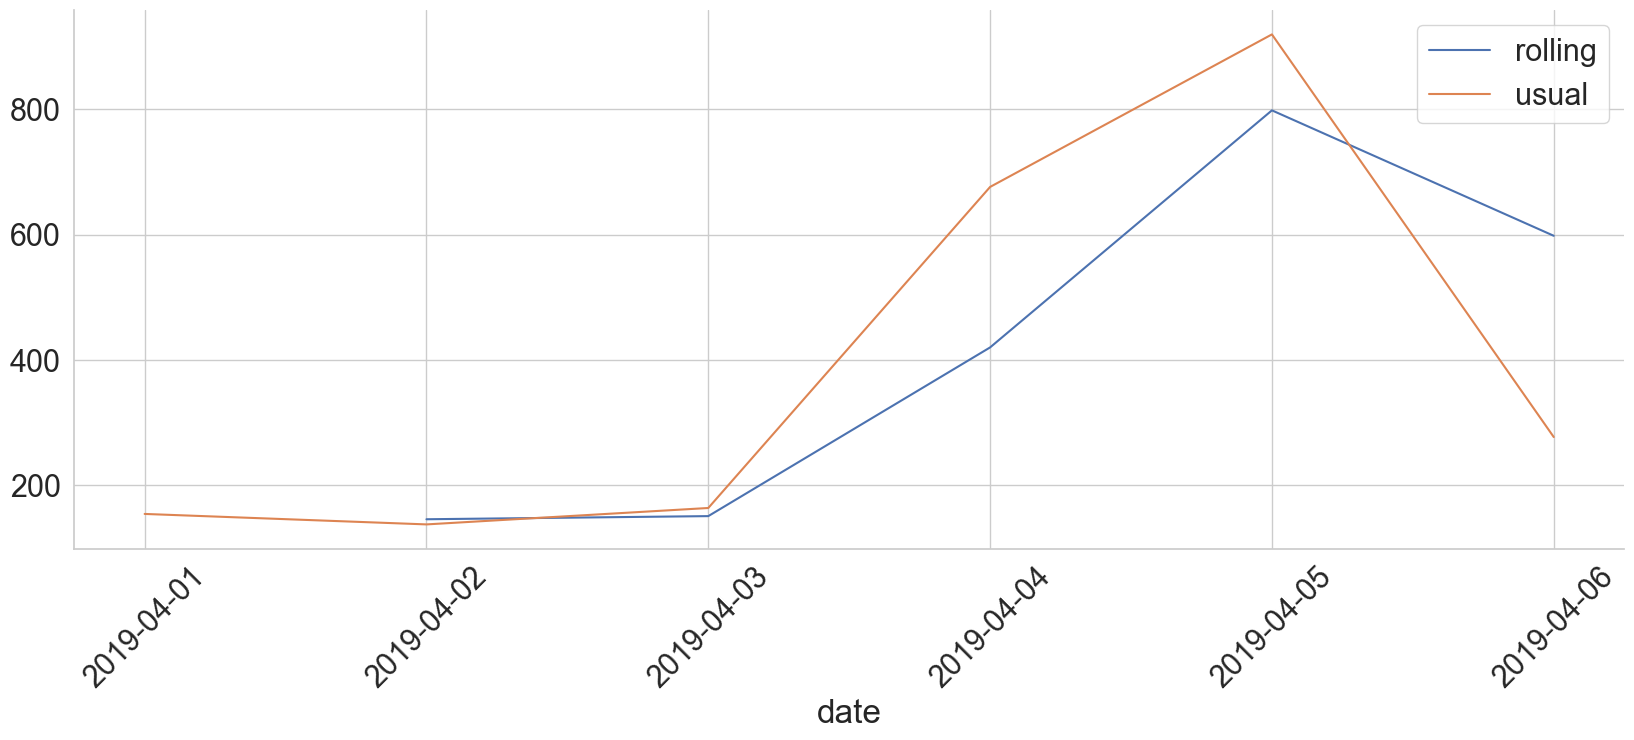

In [16]:
fig, ax = plt.subplots()
sns.lineplot(data=rolling_daily, ax=ax, label='rolling')
sns.lineplot(data=mean_views, ax=ax, label='usual')
ax.tick_params(axis='x', rotation=45)
plt.legend()
sns.despine()

In [17]:
merged = ads_clients_data.merge(ads_data, on=['client_union_id'], suffixes=('_clients_data', '_ad_data'))
merged.head()

,date_clients_data,client_union_id,community_id,create_date,date_ad_data,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035


In [18]:
merged['difference'] = merged.date_ad_data - merged.create_date

In [19]:
first_ad = merged.groupby('client_union_id').difference.min()
first_ad

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: difference, Length: 838, dtype: timedelta64[ns]

In [20]:
first_ad.mean()

Timedelta('124 days 09:04:43.532219570')

In [21]:
first_ad.mean().days

124

In [22]:
treshold = pd.Timedelta(365, unit='day')
lt_365 = first_ad.loc[first_ad < treshold]
lt_365

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: difference, Length: 838, dtype: timedelta64[ns]

In [23]:
np.round(len(lt_365) / ads_clients_data.client_union_id.nunique() * 100, 2)

np.float64(0.69)

In [24]:
bins = [0, 30, 90, 180, 365]
bins = [pd.Timedelta(x, 'd') for x in bins]
bins

[Timedelta('0 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('90 days 00:00:00'),
 Timedelta('180 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

In [25]:
labels = ['0 - 30', '30 - 90', '90 - 180', '180 - 365']

In [26]:
binned_first = pd.cut(first_ad, bins, labels=labels)
binned_first.head()

client_union_id
1     90 - 180
9     90 - 180
13     30 - 90
16    90 - 180
20     30 - 90
Name: difference, dtype: category
Categories (4, object): ['0 - 30' < '30 - 90' < '90 - 180' < '180 - 365']

In [27]:
binned_first.value_counts()

difference
90 - 180     396
30 - 90      263
180 - 365    168
0 - 30        11
Name: count, dtype: int64

In [28]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
pip install jupyter --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
#sns.barplot(binned_first.value_counts())
px.bar(binned_first.value_counts())